# Titanic Data Analysis

# Steps to be done
## 1. Collecting the Data
## 2. Ananlyze The Data
## 3. Data Wrangling
## 4. Train Test
## 5. Accuracy Check

In [96]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import math

In [97]:
titanic_data=pd.read_csv('E:\\Kunu(Machine Learning)\\Logistic_Regression\\train.csv')

In [98]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [99]:
print('no. of passenger'+str(len(titanic_data.index)))

no. of passenger891


# Analyzing Data

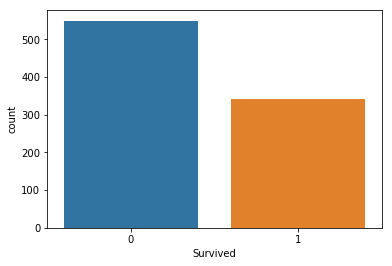

In [100]:
sns.countplot(x='Survived',data=titanic_data)

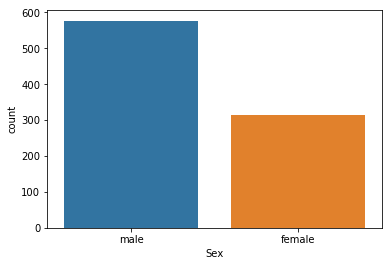

In [101]:
sns.countplot(x='Sex',data=titanic_data)

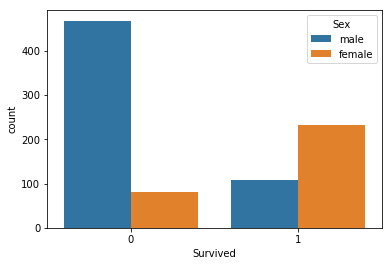

In [102]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

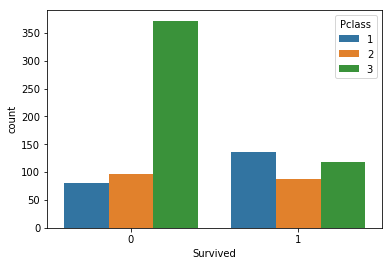

In [103]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

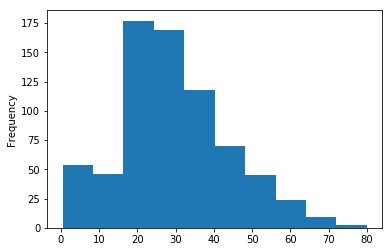

In [104]:
titanic_data['Age'].plot.hist()

## Data Wrangling

### Cleaning the data by removing the non values and unnecessary columns from the dataset

In [105]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [106]:
titanic_data.isnull().sum()
# it will give the colums of Missing values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

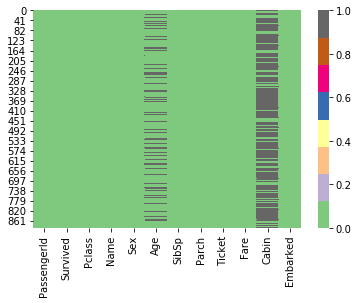

In [107]:
sns.heatmap(titanic_data.isnull(),cmap='Accent')

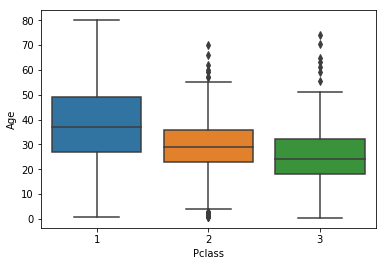

In [108]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [109]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [111]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [112]:
#To drop the Null values
titanic_data.dropna(inplace=True)

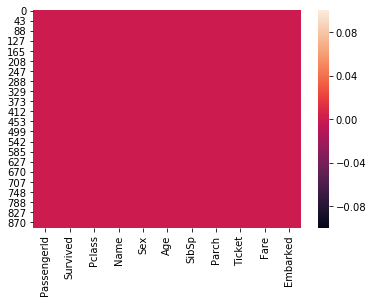

In [113]:
sns.heatmap(titanic_data.isnull())

In [114]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [115]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [116]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [117]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [118]:
pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [119]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)

In [120]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [121]:
titanic_data.drop(['Pclass','Embarked','Sex','Ticket','PassengerId'],axis=1,inplace=True)

In [122]:
titanic_data.head()

,Survived,Name,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,0,1


In [123]:
titanic_data.drop(['Name'],axis=1,inplace=True)

In [124]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Train Test Split

In [126]:
X=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [127]:
from sklearn.cross_validation import train_test_split

C:\Users\Kunu\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
model=LogisticRegression()

In [165]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
y_pred=model.predict(X_test)

In [167]:
y_train

830    1
566    0
149    0
106    1
290    1
791    0
851    0
136    1
20     0
877    0
757    0
225    0
600    1
641    1
60     0
546    1
482    0
472    1
12     0
114    0
870    0
765    1
187    1
518    1
476    0
853    1
845    0
458    1
151    1
67     0
      ..
677    1
398    0
8      1
494    0
177    0
112    0
607    1
637    0
268    1
730    1
708    1
501    0
840    0
622    1
316    1
592    0
446    1
318    1
344    0
222    0
350    0
491    0
644    1
734    0
162    0
182    0
809    1
94     0
292    0
51     0
Name: Survived, Length: 569, dtype: int64

In [168]:
y_test

689    1
279    1
508    0
9      1
496    1
150    0
474    0
469    1
794    0
864    0
553    1
226    1
204    1
713    0
751    1
349    0
74     1
321    0
743    0
873    0
647    1
327    1
684    0
769    0
91     0
272    1
770    0
27     0
141    1
733    0
      ..
741    0
636    0
672    0
345    1
68     1
357    0
514    0
81     1
231    0
881    0
174    0
188    0
419    0
319    1
876    0
808    0
706    1
534    0
554    1
90     0
99     0
608    1
869    1
148    0
666    0
582    0
44     1
236    0
780    1
884    0
Name: Survived, Length: 143, dtype: int64

In [169]:
from sklearn.metrics import confusion_matrix

In [170]:
confusion_matrix(y_test,y_pred)

array([[69, 16],
       [18, 40]], dtype=int64)

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
accuracy_score(y_test,y_pred)

0.76223776223776218